## NAME: Jorge García

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

#### Funciones que se van a usar.

In [3]:
def aplicar_dilatacion(imagen, tamano_elemento_estructurante=5):
    # Definir el elemento estructurante (kernel) en forma de cuadrado
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (tamano_elemento_estructurante, tamano_elemento_estructurante))

    # Aplicar la operación de dilatación
    imagen_dilatada = cv2.dilate(imagen, kernel)

    return imagen_dilatada

In [4]:
def obtener_imprimir_estadisticas(imagen):
    media = np.mean(imagen)
    desviacion_estandar = np.std(imagen)
    mediana = np.median(imagen)
    valor_maximo = np.max(imagen)
    valor_minimo = np.min(imagen)

    # Imprimir los resultados
    print(f'Media: {media}')
    print(f'Desviación Estándar: {desviacion_estandar}')
    print(f'Mediana: {mediana}')
    print(f'Valor Máximo: {valor_maximo}')
    print(f'Valor Mínimo: {valor_minimo}')
    print('-'*10)

    # Retornar las estadísticas como una tupla
    return media, desviacion_estandar, mediana, valor_maximo, valor_minimo

##### Mostrar - Histograma mostrar_histogramas(histogramas)

In [5]:
def mostrar_histogramas(histogramas):
    # Mostrar el histograma
    plt.subplot(2, 1, 2)
    plt.plot(histogramas, color='blue')
    plt.title('Histograma de la imagen en escala de grises')
    plt.xlabel('Valor de píxel')
    plt.ylabel('Frecuencia')

    # Mostrar los gráficos
    plt.show()

##### Mostrar Imagenes - mostrar_imagenes(images)

In [6]:
def mostrar_imagenes(images,title):
    fig, axs = plt.subplots(1, len(images), figsize=(15, 3))

    for i, imagen in enumerate(images):
        axs[i].imshow(imagen, cmap='gray')  # Asegúrate de especificar el mapa de colores si las imágenes son en escala de grises
        axs[i].set_title(title[i])
        axs[i].axis('off')

    plt.show()

##### Mostrar solo una imagen - mostrar_una_imagen(imagen_a_mostrar,title='',gray=False)

In [7]:
def mostrar_una_imagen(imagen_a_mostrar,title='',gray=False):
    if gray: 
        plt.imshow(imagen_a_mostrar, cmap='gray')
    else:
        plt.imshow(imagen_a_mostrar)
        
    plt.title(title)
    plt.axis('off')
    plt.show()

##### Umbralizacion en HSV - umbralizar_en_HSV(imagen, desplazamiento_h=0, desplazamiento_s=0, desplazamiento_v=0)

In [8]:
def umbralizar_en_HSV(imagen, desplazamiento_h=0, desplazamiento_s=0, desplazamiento_v=0):
    # Convertir la imagen a formato HSV
    imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

    # Definir rangos de umbral para cada canal HSV con desplazamientos
    rango_h = (0 + desplazamiento_h, 180 + desplazamiento_h)
    rango_s = (0 + desplazamiento_s, 255 + desplazamiento_s)
    rango_v = (0 + desplazamiento_v, 255 + desplazamiento_v)

    # Aplicar umbralizado en cada canal
    umbral_h = cv2.inRange(imagen_hsv[:, :, 0], rango_h[0], rango_h[1])
    umbral_s = cv2.inRange(imagen_hsv[:, :, 1], rango_s[0], rango_s[1])
    umbral_v = cv2.inRange(imagen_hsv[:, :, 2], rango_v[0], rango_v[1])

    # Combinar los umbrales
    resultado_umbral = cv2.bitwise_and(imagen, imagen, mask=cv2.bitwise_and(umbral_h, cv2.bitwise_and(umbral_s, umbral_v)))

    return resultado_umbral


##### Aplica una apertura aplicar_apertura(imagen, tamano_elemento_estructurante=5)

In [9]:
def aplicar_apertura(imagen, tamano_elemento_estructurante=5):
    # Definir el elemento estructurante (kernel) en forma de cuadrado
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (tamano_elemento_estructurante, tamano_elemento_estructurante))

    # Aplicar la operación de apertura
    imagen_apertura = cv2.morphologyEx(imagen, cv2.MORPH_OPEN, kernel)

    return imagen_apertura

##### Ajusta la imagen - imadjust(src, tol=1, in_range=(0, 255), out_range=(0, 255))

In [10]:
def imadjust(src, tol=1, in_range=(0, 255), out_range=(0, 255)):
    # src : imagen de entrada en formato CV_8UC1
    # tol : tolerancia, de 0 a 100.
    # in_range : límites de la imagen de entrada
    # out_range : límites de la imagen de salida

    dst = src.copy()

    tol = max(0, min(100, tol))

    if tol > 0:
        # Calcular límites de entrada y salida

        # Histograma
        hist = cv2.calcHist([src], [0], None, [256], [0, 256])

        # Histograma acumulativo
        cum = hist.cumsum()

        # Calcular límites
        total = src.size
        low_bound = total * tol // 100
        upp_bound = total * (100 - tol) // 100
        in_range = np.searchsorted(cum, low_bound), np.searchsorted(cum, upp_bound)

    # Estirar
    scale = (out_range[1] - out_range[0]) / (in_range[1] - in_range[0])
    dst = np.clip((src - in_range[0]) * scale + 0.5 + out_range[0], out_range[0], out_range[1]).astype(np.uint8)

    return dst

In [11]:
def mostrar_imagen_cv(imgin):
    cv2.imshow('Imagen Binarizada', imgin)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

#### Tomar las imágenes que se van a trabajar. 

In [12]:
# Rutas de las imágenes 
rutas_imagenes = [
    "frame_001.jpg",
    "frame_005.jpg",
    "frame_009.jpg",
    "frame_013.jpg",
    "frame_017.jpg"
]
nombres =['2000','2004','2008','2012','2016']

imagenes = []

for ruta in (rutas_imagenes):
    imagenes.append(mpimg.imread(ruta))


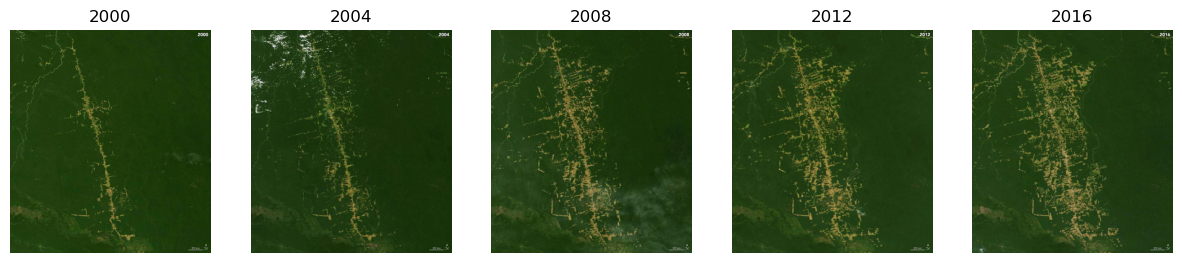

In [13]:
# Mostrar las imágenes usando Matplotlib
fig, axs = plt.subplots(1, 5, figsize=(15, 3))

for i, imagen in enumerate(imagenes):
    #mostrar_una_imagen(imagen,title=nombres[i])
    axs[i].imshow(imagen)
    axs[i].set_title(nombres[i])
    axs[i].axis('off')

plt.show()

#### Eliminar Números y Letras

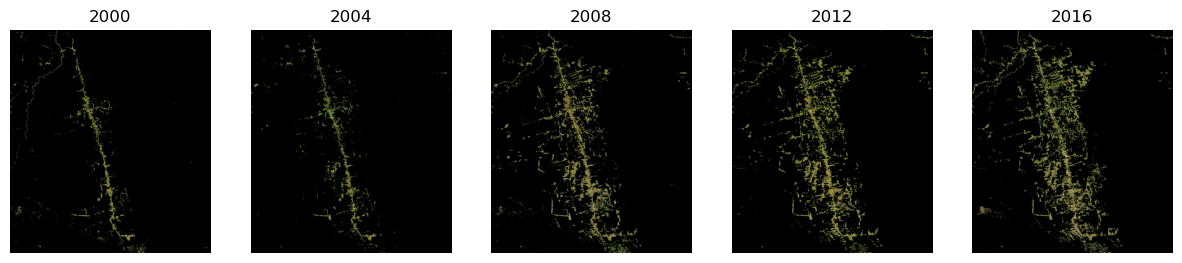

In [14]:
imagenes_HSV_umbralizada = []
for i,pic in enumerate(imagenes):
    resultado =umbralizar_en_HSV(pic,72,75,90) #Los valores fueron encontrados con prueba y error. 
    imagenes_HSV_umbralizada.append(resultado)
    #mostrar_una_imagen(resultado,nombres[i])

mostrar_imagenes(imagenes_HSV_umbralizada,nombres)
#mostrar_imagen_cv(imagenes_HSV_umbralizada[0])

#### Conversión a Escala de Grises:

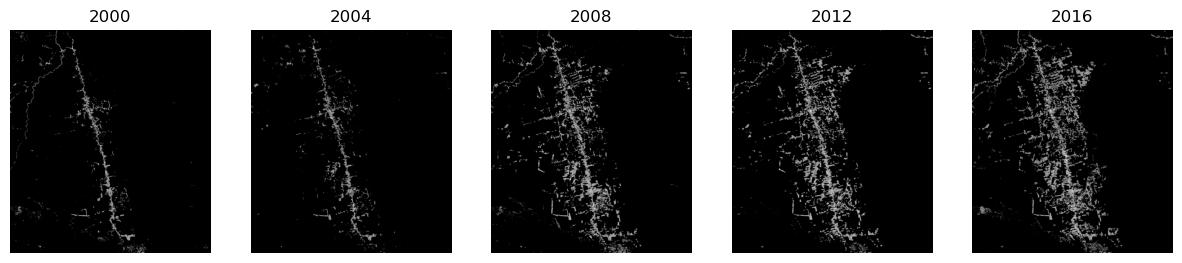

In [15]:
imagenes_grises = []
for i,pic in enumerate(imagenes_HSV_umbralizada):
    gray_img = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
    imagenes_grises.append(gray_img)
    #mostrar_una_imagen(gray_img,nombres[i],gray=True)

mostrar_imagenes(imagenes_grises,nombres)

#### Ajustamos la imagen.

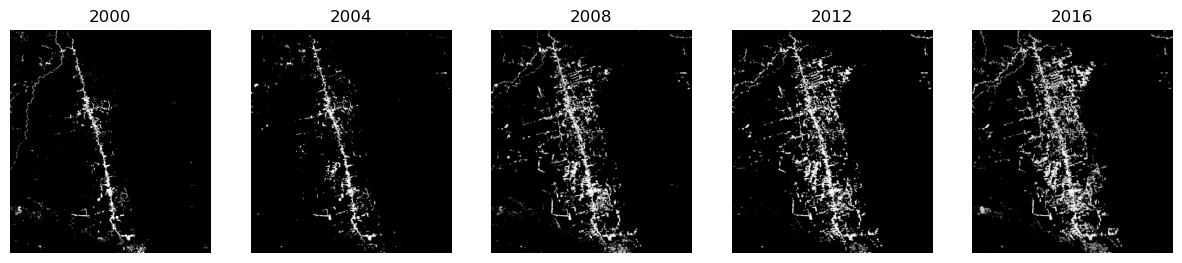

In [33]:
imagenes_ajustadas = []
for i,pic in enumerate(imagenes_grises):
    ajustar = imadjust(pic, tol=2)
    imagenes_ajustadas.append(ajustar)
    #mostrar_una_imagen(ajustar,nombres[i])
    
mostrar_imagenes(imagenes_ajustadas,nombres)

#### Apertura y Dilatación Morfológica

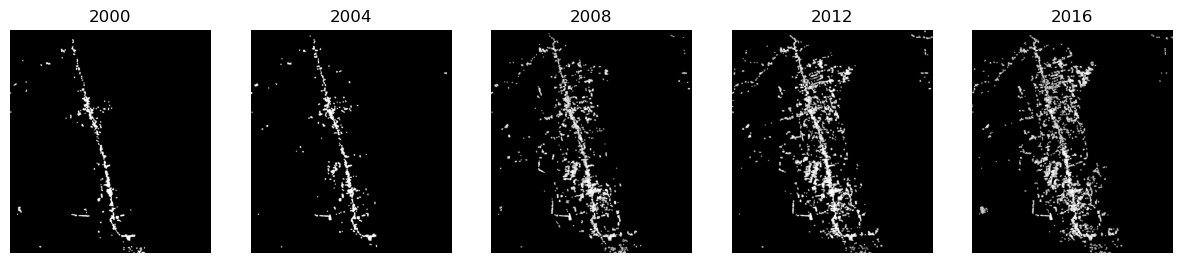

In [35]:
imagenes_morph=[]
for i,pic in enumerate(imagenes_ajustadas):
    img = aplicar_apertura(pic,3)
    img =aplicar_dilatacion(img,2)
    imagenes_morph.append(img)
    #mostrar_una_imagen(img,nombres[i],gray=True)
mostrar_imagenes(imagenes_morph,nombres)

#### Binarizamos la imagen

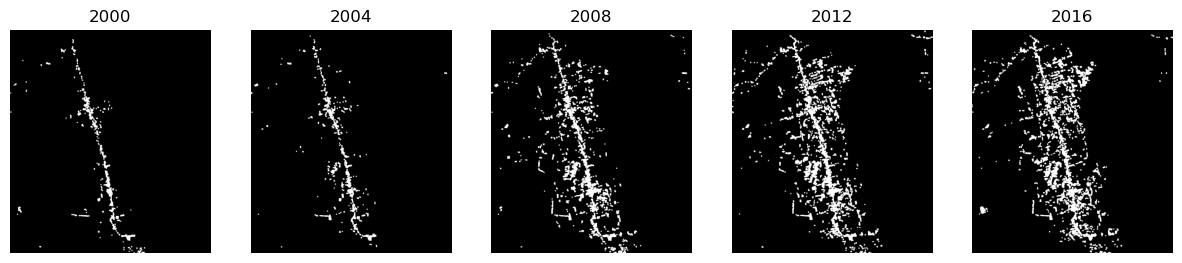

In [36]:
imagenes_binarizadas = []

for i,pic in enumerate(imagenes_morph):
    nivel_umbral =29 #Número encontrado debido a diversas pruebas
    img_binaria = np.where(pic >= nivel_umbral, 255, 0).astype(np.uint8)
    imagenes_binarizadas.append(img_binaria)
   
    #mostrar_una_imagen(imagenes_binarizadas)
mostrar_imagenes(imagenes_binarizadas,nombres)

#### Superposición de imágenes para resaltar áreas desforestadas. 

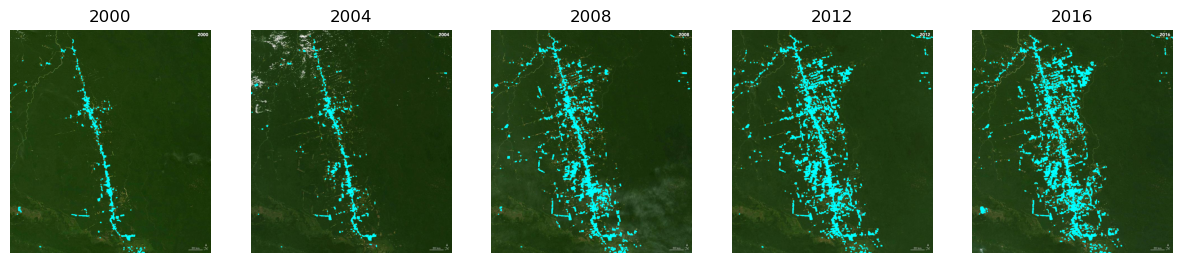

In [19]:
img_final = []
for pict, orig in zip(imagenes_binarizadas, imagenes):
    if orig.shape[:2] != pict.shape[:2]:
        pict = cv2.resize(pict, (orig.shape[1], orig.shape[0]))
    pict_color = cv2.cvtColor(pict, cv2.COLOR_GRAY2BGR)
    # Hacer una máscara utilizando la imagen binarizada
    mascara = pict_color > 0
    # Cambiar el valor de los píxeles donde la máscara es verdadera a celeste [0, 255, 255]
    resultado = np.where(mascara, [0, 255, 255], orig)
    img_final.append(resultado)
    #mostrar_una_imagen(resultado)

mostrar_imagenes(img_final,nombres)

### Resultados obtenidos

In [20]:
areas = []
for pic in imagenes_binarizadas:
    
    contornos, _ = cv2.findContours(pic, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calcular el área para cada contorno encontrado
    area_total = 0

    # Calcular el área para cada contorno encontrado y sumar al área total
    for contorno in contornos:
        area = cv2.contourArea(contorno)
        area_total += area
    
    relacion_pixeles_metros = (51/20) # Cada 51 píxeles equivalen a 20 km

    # Convertir el área total de píxeles a metros cuadrados
    area_total_metros_cuadrados = round(area_total * (relacion_pixeles_metros**2))
    
    areas.append(area_total_metros_cuadrados)
    
    print(f"Área total de la imagen: {area_total_metros_cuadrados} m2")

Área total de la imagen: 50177 m2
Área total de la imagen: 63770 m2
Área total de la imagen: 172814 m2
Área total de la imagen: 240378 m2
Área total de la imagen: 257753 m2


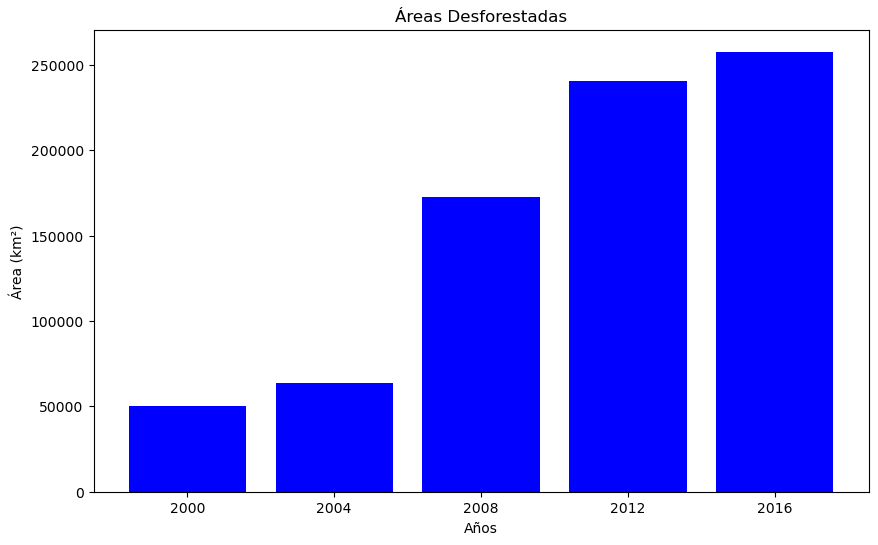

In [21]:
# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(nombres, areas, color='blue')

# Etiquetas y título
plt.xlabel('Años')
plt.ylabel('Área (km²)')
plt.title('Áreas Desforestadas')

# Mostrar el gráfico
plt.show()